In [172]:
#This code forms part of the course Gaussian Process Regression for Bayesian Machine Learning, wich is available at https://www.udemy.com/course/gaussian-process-regression-fundamentals-and-application/?src=sac&kw=gaussian+process+regre

#Follow the course for an explanation of the code as well as a fundamental understanding of Gaussian process regression.

#---------------------------------
#Do not edit from here

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin, Sum, Product

np.random.seed(1)

df = pd.read_csv('weather_data.csv', sep=';')

df_array = np.asarray(df)

date = df_array[0:177, 0]
rec_num = df_array[0:177, 1]
ghi = df_array[0:177, 2]
DNI = df_array[0:177, 3]
DHI = df_array[0:177, 4]
DHI_shadowband = df_array[0:177, 5]
UVA = df_array[0:177, 6]
UVB = df_array[0:177, 7]
air_temp = df_array[0:177, 8]
BP = df_array[0:177, 9]
RH = df_array[0:177, 10]
WS = df_array[0:177, 11]
WD = df_array[0:177, 12]
WD_SD = df_array[0:177, 13]

y = np.asarray(
    [ghi, DNI, DHI, DHI_shadowband, UVA, UVB, air_temp, BP, RH, WS, WD,
     WD_SD]).T

X = np.atleast_2d([
    1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17.,
    18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
    33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
    48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
    63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
    78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
    93., 94., 95., 96., 97., 98., 99., 100., 101., 102., 103., 104., 105.,
    106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
    118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
    130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
    142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
    154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
    166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177
]).T

#---------------------------------
#Edit from here (replace all XXXX placeholders)

x = np.atleast_2d(np.linspace(
    1, 177, 10000)).T  #Fill in the amount of test points you want.

#--

kernel = C()*Exp(length_scale=24,periodicity=1)  #Construct your own kernel. Example: C()*Exp(length_scale=24,periodicity=1).

gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=4)  #Choose your amount of optimizer restarts.

gp.fit(X, y)
y_pred_1, sigma_1 = gp.predict(x, return_std=True)

#---
#1e-5,
kernel = C()*RBF(length_scale=1e-7, length_scale_bounds=(1e-8, 2))  #Construct your own kernel. Example: C()*RBF(length_scale=24, length_scale_bounds=(1e-5, 2))

gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=4)  #Choose your amount of optimizer restarts.

gp.fit(X, y)
y_pred_2, sigma_2 = gp.predict(x, return_std=True)

#---------------------------------

kernel = C()*RQ(length_scale=24, alpha=1)
gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=4)
gp.fit(X,y)
y_pred_3, sigma_3 = gp.predict(x, return_std=True)
  #Construct your own kernel. Example: C()*RBF(length_scale=24, length_scale_bounds=(1e-5, 2))

#---------------------------------
kernel = C()*Exp(length_scale=24,periodicity=1)*RQ(length_scale=24, alpha=0.5, alpha_bounds=(1e-5, 100000.0), length_scale_bounds=(1e-5, 2))
gp = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=4)
gp.fit(X,y)
y_pred_4, sigma_4 = gp.predict(x, return_std=True)
#---------------------------------
kernel = C()*RBF(length_scale=24, length_scale_bounds=(1e-5, 2))*RQ(length_scale=1, alpha=0.5, alpha_bounds=(1e-5, 100000.0), length_scale_bounds=(1e-5, 2)) +Exp(length_scale=24,periodicity=1)

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=160)
gp.fit(X,y)
y_pred_5, sigma_5 = gp.predict(x, return_std=True) 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kern

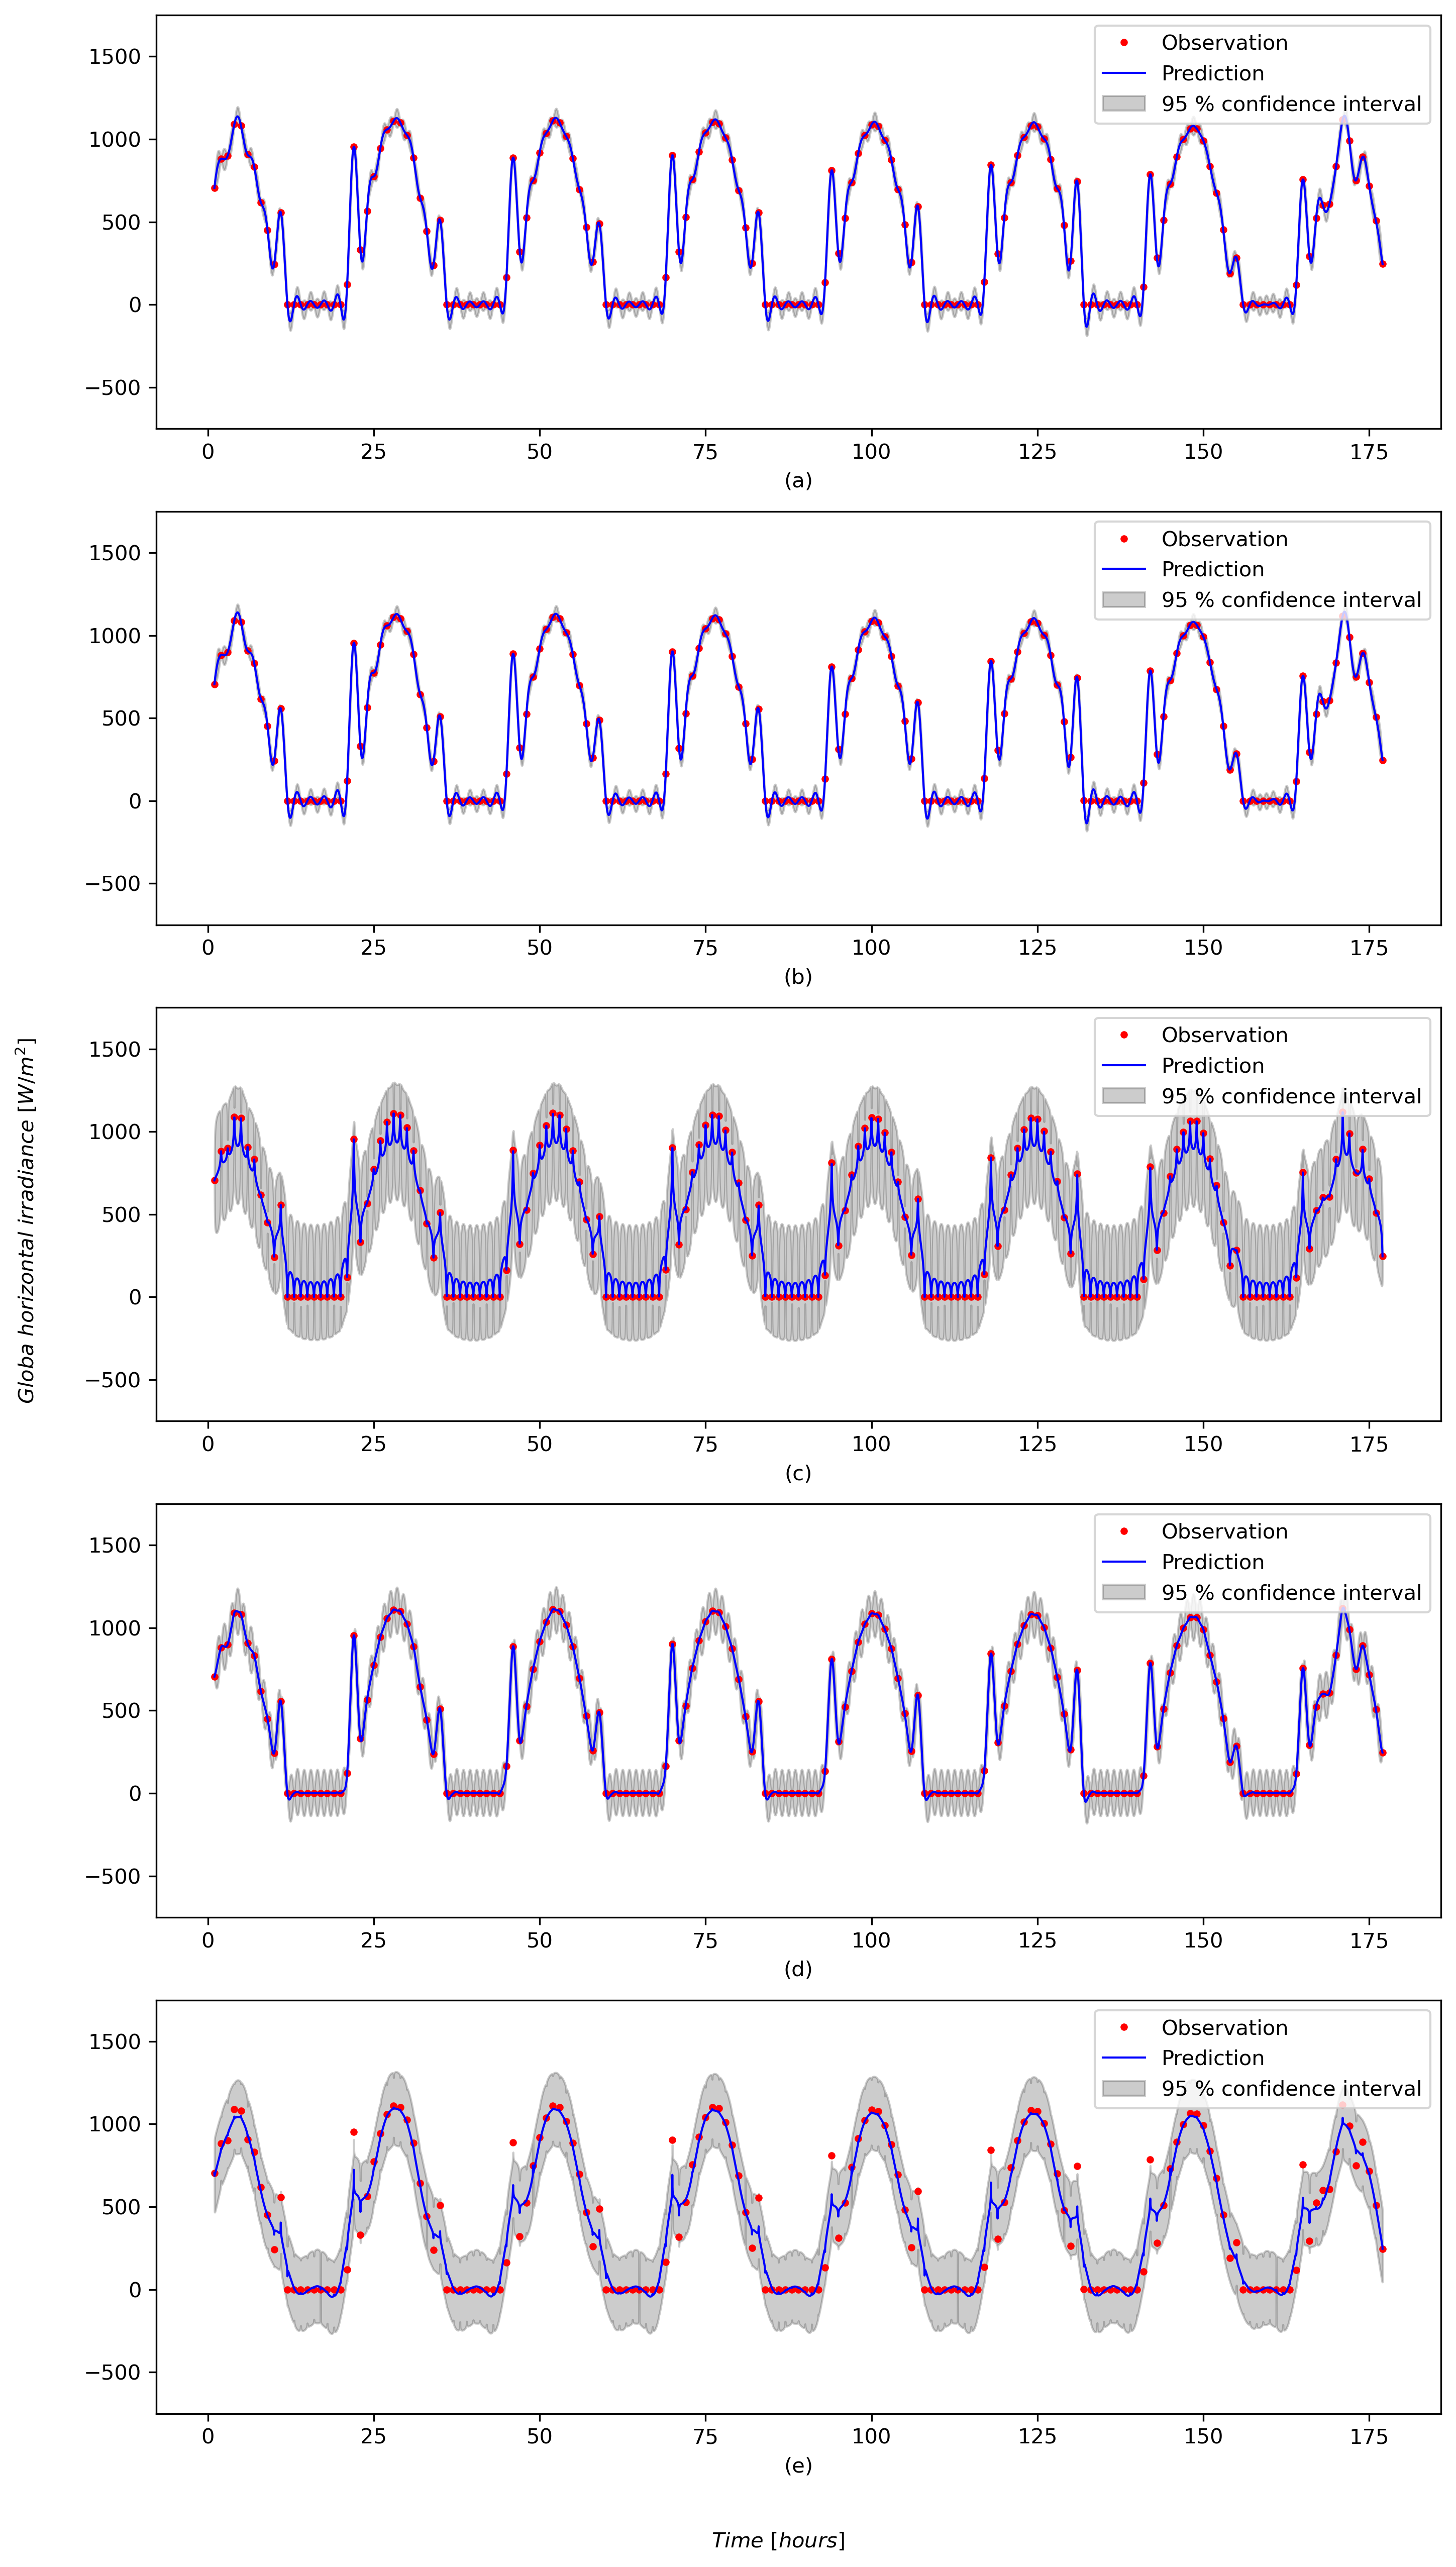

In [173]:

#Plot figure
fig = plt.figure(
    num=1, figsize=(11, 0.8), dpi=300, facecolor='w', edgecolor='k')
fig.text(0.5, -1, '$Time\ [hours]$', ha='center')
fig.text(
    0.04,
    10,
    '$Globa\ horizontal\ irradiance\ [W/m^2]$',
    va='center',
    rotation='vertical')

plt.subplot(5, 1, 1)
plt.plot(X, y[:, 0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_1[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_1[:, 0] - 1.96 * sigma_1[:,0],
    y_pred_1[:, 0] + 1.96 * sigma_1[:,0],
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(a)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplot(5, 1, 2)
plt.plot(X, y[:, 0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_2[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_2[:, 0] - 1.96 * sigma_2[:,0],
    y_pred_2[:, 0] + 1.96 * sigma_2[:,0],
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(b)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplot(5,1,3)
plt.plot(X, y[:,0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_3[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_3[:, 0] - 1.96 * sigma_3[:,0],
    y_pred_3[:, 0] + 1.96 * sigma_3[:,0],
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(c)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)



plt.subplot(5,1,4)
plt.plot(X, y[:,0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_4[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_4[:, 0] - 1.96 * sigma_4[:,0],
    y_pred_4[:, 0] + 1.96 * sigma_4[:,0],
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(d)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)

plt.subplot(5,1,5)
plt.plot(X, y[:,0], 'r.', markersize=5, label=u'Observation')
plt.plot(x, y_pred_5[:, 0], 'b-', linewidth=1, label=u'Prediction')
plt.fill_between(
    x[:, 0],
    y_pred_5[:, 0] - 1.96 * sigma_5[:,0],
    y_pred_5[:, 0] + 1.96 * sigma_5[:,0],
    alpha=0.2,
    color='k',
    label=u'95 % confidence interval')
plt.xlabel('(e)')
plt.legend(loc='upper right', fontsize=10)
plt.ylim(-750, 1750)
plt.subplots_adjust(top=20)

plt.savefig('all_in.png', bbox_inches='tight')

#---------------------------------

